# <center>Analysis of Women Primary School Completion Rate</center>
#### <center>Mengfan Zhang</center>

# Introduction
Nowadays, as is posted by J.P. Morgan research, the probability of the global economy recession by the end of 2024 is estimated to be 35%, which is a relatively higher chance comparing with 25%, the probability by the end of 2023. Therefore, it's more and more important to figure out ways to promote economic growth. The increase of female primary school completion rate is one of them. As defined by DataBank, female primary school completion rate is the population of girls that newly entering the last grade of primary school divided by the population of girls of their same age. This indicator doesn't count repeaters or those who drop from the last grade, but it's enough for us to take a look into how much the ratio of female primary school completion has changed over years and other factors. As mentioned in the webpage of Millenium Challenge Corporation, it's proven that there exists strong positive correlation between female primary school completion rate and promoted economic growth.<br><br>
This is a tutorial to walk through the lifecycle of data science. The main parts of the lifecycle includes:
- Data collection
- Data processing
- Exploratory analysis and data visualization
- Analysis, hypothesis testing and Machine Learning
- Insight and policy decision

## Importing libraries
Before we start collecting data, we need to import the required libraries, which enables us apply pre-written functions and saves our time. Usually in a whole data science lifecycle, this part does not need to be completed at first since we always realize the lack of library after a runtime error of unknown operation is reported. However, as a tutorial, this part appears in the first place.

In [213]:
import numpy as np                         # library for operations on large amount of data
import pandas as pd                        # library for operations on dataframes, the fundational data structure throughout this tutorial
import matplotlib.pyplot as plt            # library for plotting the data, important to data visualization
from statsmodels.formula.api import ols    # library for assessing how much linear models fit correspnding data

Numpy and pandas are fundamental libraries in a data science lifecycle

In [215]:
data_alled = pd.read_csv("all_education_data.csv", skiprows=3)
data_alled.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,98.097252,108.233528,103.185188,100.936768,95.01976,NaN,NaN


In [216]:
data_gdppc = pd.read_csv("GDP_per_capita.csv", skiprows=3)
data_gdppc.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,37231.918495,37444.441094,38697.949507,40379.293724,40124.757998,30437.202516,38226.146157,45236.021214,NaN,NaN


In [217]:
data_womed = pd.read_csv("women_education_data.csv", skiprows=3)
data_womed.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106.101189,107.025414,99.409157,103.091187,93.406593,NaN,NaN


In [218]:
data_womse = pd.read_csv("women_school_enrollment_data.csv", skiprows=3)
data_womse.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,116.41345,NaN,NaN,109.338722,109.263962,110.42865,113.950348,106.201759,NaN,NaN


In [219]:
data_ctry = pd.read_csv("countries_data.csv")
data_ctry.head(1)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN


In [220]:
data_alled = data_alled.dropna(axis = 1, how = 'all')
data_gdppc = data_gdppc.dropna(axis = 1, how = 'all')
data_womed = data_womed.dropna(axis = 1, how = 'all')
data_womse = data_womse.dropna(axis = 1, how = 'all')
data_ctry = data_ctry.dropna(axis = 1, how = 'all')

In [221]:
data_alled.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,106.117989,NaN,NaN,NaN,98.097252,108.233528,103.185188,100.936768,95.01976,NaN


In [222]:
# Drop columns from 1970 to 1989 for the other three dataframes
data_alled = data_alled.drop(data_alled.loc[:, '1970':'1989'].columns, axis=1)
data_womed = data_womed.drop(data_womed.loc[:, '1970':'1989'].columns, axis=1)
data_womse = data_womse.drop(data_womse.loc[:, '1970':'1989'].columns, axis=1)
data_womse.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,117.00074,116.41345,NaN,NaN,109.338722,109.263962,110.42865,113.950348,106.201759,NaN


In [223]:
set(data_alled['Country Code'])-(set(data_alled['Country Code']).intersection(set(data_ctry['Country Code'])))

{'INX'}

In [224]:
[str(x) for x in range(1990,2024)];

Country Code
ABW    Axes(0.125,0.11;0.775x0.77)
AFE    Axes(0.125,0.11;0.775x0.77)
AFG    Axes(0.125,0.11;0.775x0.77)
AFW    Axes(0.125,0.11;0.775x0.77)
AGO    Axes(0.125,0.11;0.775x0.77)
                  ...             
XKX    Axes(0.125,0.11;0.775x0.77)
YEM    Axes(0.125,0.11;0.775x0.77)
ZAF    Axes(0.125,0.11;0.775x0.77)
ZMB    Axes(0.125,0.11;0.775x0.77)
ZWE    Axes(0.125,0.11;0.775x0.77)
Name: value, Length: 266, dtype: object

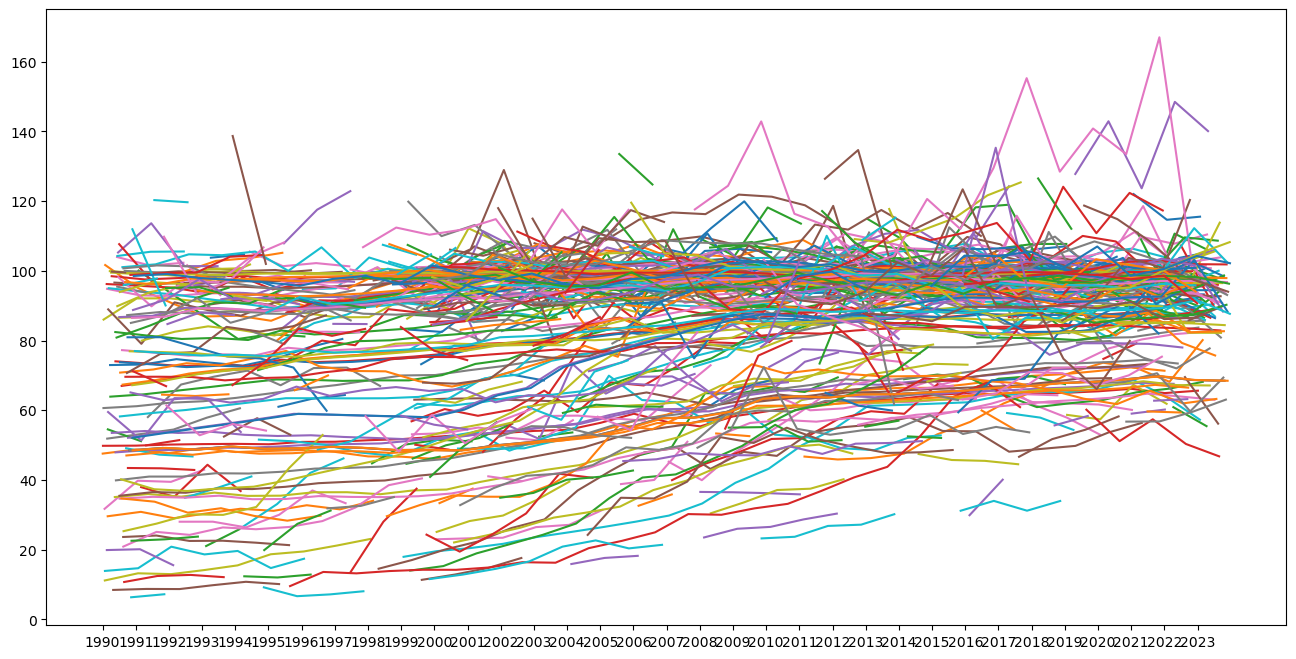

In [225]:
unique_years, idx = np.unique(pd.melt(data_womed, id_vars=['Country Code','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)])['variable'].values,return_index=True)
plt.xticks(pd.melt(data_womed, id_vars=['Country Code','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).index[idx], unique_years)
pd.melt(data_womed, id_vars=['Country Code','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).sort_values(['Country Code','variable'],ascending=True).groupby('Country Code')['value'].plot(figsize=(16,8))

In [226]:
# initialize all the dataframes to "dirty" version to prevent unwanted inplace change
data_alled = pd.read_csv("all_education_data.csv", skiprows=3)
data_gdppc = pd.read_csv("GDP_per_capita.csv", skiprows=3)
data_womed = pd.read_csv("women_education_data.csv", skiprows=3)
data_womse = pd.read_csv("women_school_enrollment_data.csv", skiprows=3)
data_ctry = pd.read_csv("countries_data.csv")
data_alled = data_alled.dropna(axis = 1, how = 'all')
data_gdppc = data_gdppc.dropna(axis = 1, how = 'all')
data_womed = data_womed.dropna(axis = 1, how = 'all')
data_womse = data_womse.dropna(axis = 1, how = 'all')
data_ctry = data_ctry.dropna(axis = 1, how = 'all')
data_alled = data_alled.drop(data_alled.loc[:, '1970':'1989'].columns, axis=1).drop(['Country Name','Indicator Code'], axis=1)
data_womed = data_womed.drop(data_womed.loc[:, '1970':'1989'].columns, axis=1).drop(['Country Name','Indicator Code'], axis=1)
data_womse = data_womse.drop(data_womse.loc[:, '1970':'1989'].columns, axis=1).drop(['Country Name','Indicator Code'], axis=1)
data_ctry = data_ctry.drop(['SpecialNotes','TableName'], axis=1)
data_ctry[['Region','IncomeGroup']] = data_ctry[['Region','IncomeGroup']].fillna(value='-')

In [227]:
data_womed = pd.merge(data_ctry, data_womed, on='Country Code', how='left')
data_womse = pd.merge(data_ctry, data_womse, on='Country Code', how='left')
data_alled = pd.merge(data_ctry, data_alled, on='Country Code', how='left')
data_gdppc = pd.merge(data_ctry, data_gdppc, on='Country Code', how='left')

In [228]:
data_womed.shape

(265, 38)

In [229]:
# Since some of the countries don't have any data during 1990 and 2023 in any of the four tables,
# we need to find those countries and drop them from all four tables.

# rows of all NaN in female Primary completion rate
idx1 = data_womed.index[data_womed[[str(x) for x in range(1990,2024)]].isnull().all(1)]
# rows of all NaN in overall Primary completion rate
idx2 = data_alled.index[data_alled[[str(x) for x in range(1990,2024)]].isnull().all(1)]
# rows of all NaN in female school enrollment rate
idx3 = data_womse.index[data_womse[[str(x) for x in range(1990,2024)]].isnull().all(1)]
# rows of all NaN in GDP per capita
idx4 = data_gdppc.index[data_gdppc[[str(x) for x in range(1990,2024)]].isnull().all(1)]
rows_to_drop = list(set(idx1).union(set(idx2)).union(set(idx3)).union(set(idx4)))

In [230]:
# drop those rows
data_womed = data_womed.drop(data_womed.index[rows_to_drop])
data_alled = data_alled.drop(data_alled.index[rows_to_drop])
data_womse = data_womse.drop(data_womse.index[rows_to_drop])
data_gdppc = data_gdppc.drop(data_gdppc.index[rows_to_drop])

In [231]:
data_womed.head()

,Country Code,Region,IncomeGroup,Indicator Name,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Latin America & Caribbean,High income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,...,106.056129,NaN,NaN,NaN,106.101189,107.025414,99.409157,103.091187,93.406593,NaN
1,AFE,-,-,"Primary completion rate, female (% of relevant...",47.559921,48.741920,47.698872,49.168579,48.006962,48.312119,...,66.414238,66.434967,67.416733,68.639549,69.875000,70.373734,71.271111,72.304916,71.336227,NaN
2,AFG,South Asia,Low income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,17.072041,NaN,NaN,...,NaN,NaN,65.567612,69.041924,69.766609,67.502800,NaN,NaN,NaN,NaN
3,AFW,-,-,"Primary completion rate, female (% of relevant...",49.794651,49.846691,50.147141,50.284180,50.357540,50.240330,...,63.280010,64.309517,64.928780,64.457779,64.781212,64.994743,65.438469,66.152931,64.926788,65.61779
4,AGO,Sub-Saharan Africa,Lower middle income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.030548,60.200428,NaN


In [232]:
rows_to_drop = list(data_gdppc.index[data_gdppc.isnull().any(axis=1)])
# drop those rows
data_womed = data_womed.drop(rows_to_drop,axis=0)
data_alled = data_alled.drop(rows_to_drop,axis=0)
data_womse = data_womse.drop(rows_to_drop,axis=0)
data_gdppc = data_gdppc.drop(rows_to_drop,axis=0)

In [233]:
len(data_womed.index[data_womed.isnull().any(axis=1)])

187

Now there are still 187 rows in the "female primary completion rate" table contain null values. For this case, imputation with regressors regarding to GDP per capita as the univariate are not what we want. Even with decision tree which produces the highest coefficient of determination (score), the predicted values for imputation are exploding to over 400. Instead, we need a nearby value, so I use ffill to fill the empty space with the nearest available year.<br> Another reason for applying $ffill$ but not $bfill$ is that 

In [235]:
data_womed[[str(x) for x in range(1990,2024)]]=data_womed[[str(x) for x in range(1990,2024)]].ffill(axis = 1).infer_objects(copy=False)
data_womse[[str(x) for x in range(1990,2024)]]=data_womse[[str(x) for x in range(1990,2024)]].ffill(axis = 1).infer_objects(copy=False)
data_alled[[str(x) for x in range(1990,2024)]]=data_alled[[str(x) for x in range(1990,2024)]].ffill(axis = 1).infer_objects(copy=False)
data_womed.head()

,Country Code,Region,IncomeGroup,Indicator Name,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,AFE,-,-,"Primary completion rate, female (% of relevant...",47.559921,48.741920,47.698872,49.168579,48.006962,48.312119,...,66.414238,66.434967,67.416733,68.639549,69.875000,70.373734,71.271111,72.304916,71.336227,71.336227
3,AFW,-,-,"Primary completion rate, female (% of relevant...",49.794651,49.846691,50.147141,50.284180,50.357540,50.240330,...,63.280010,64.309517,64.928780,64.457779,64.781212,64.994743,65.438469,66.152931,64.926788,65.617790
4,AGO,Sub-Saharan Africa,Lower middle income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,...,35.863651,35.863651,35.863651,35.863651,35.863651,35.863651,35.863651,59.030548,60.200428,60.200428
5,ALB,Europe & Central Asia,Upper middle income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,...,106.871689,98.142700,99.869720,104.463074,102.025398,94.476189,97.040092,94.849289,97.502762,91.699600
6,AND,Europe & Central Asia,High income,"Primary completion rate, female (% of relevant...",NaN,NaN,NaN,NaN,NaN,NaN,...,65.675682,68.601578,64.207649,66.091949,62.359550,61.994610,61.643841,60.092812,60.092812,68.159203


In [236]:
data_womed = pd.melt(data_womed, id_vars=['Country Code','Region','IncomeGroup','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).sort_values(['Country Code','variable'],ascending=True)
data_alled = pd.melt(data_alled, id_vars=['Country Code','Region','IncomeGroup','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).sort_values(['Country Code','variable'],ascending=True)
data_womse = pd.melt(data_womse, id_vars=['Country Code','Region','IncomeGroup','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).sort_values(['Country Code','variable'],ascending=True)
data_gdppc = pd.melt(data_gdppc, id_vars=['Country Code','Region','IncomeGroup','Indicator Name'], value_vars=[str(x) for x in range(1990,2024)]).sort_values(['Country Code','variable'],ascending=True)
data_womed.head()

,Country Code,Region,IncomeGroup,Indicator Name,variable,value
0,AFE,-,-,"Primary completion rate, female (% of relevant...",1990,47.559921
217,AFE,-,-,"Primary completion rate, female (% of relevant...",1991,48.741920
434,AFE,-,-,"Primary completion rate, female (% of relevant...",1992,47.698872
651,AFE,-,-,"Primary completion rate, female (% of relevant...",1993,49.168579
868,AFE,-,-,"Primary completion rate, female (% of relevant...",1994,48.006962


In [237]:
data_womed.rename(columns={"variable": "yearID", "value": data_womed.loc[0,'Indicator Name']}, inplace = True)
data_alled.rename(columns={"variable": "yearID", "value": data_alled.loc[0,'Indicator Name']}, inplace = True)
data_gdppc.rename(columns={"variable": "yearID", "value": data_gdppc.loc[0,'Indicator Name']}, inplace = True)
data_womse.rename(columns={"variable": "yearID", "value": data_womse.loc[0,'Indicator Name']}, inplace = True)

In [238]:
data_womed.head()

,Country Code,Region,IncomeGroup,Indicator Name,yearID,"Primary completion rate, female (% of relevant age group)"
0,AFE,-,-,"Primary completion rate, female (% of relevant...",1990,47.559921
217,AFE,-,-,"Primary completion rate, female (% of relevant...",1991,48.741920
434,AFE,-,-,"Primary completion rate, female (% of relevant...",1992,47.698872
651,AFE,-,-,"Primary completion rate, female (% of relevant...",1993,49.168579
868,AFE,-,-,"Primary completion rate, female (% of relevant...",1994,48.006962


Country Code
AFE    Axes(0.125,0.11;0.775x0.77)
AFW    Axes(0.125,0.11;0.775x0.77)
AGO    Axes(0.125,0.11;0.775x0.77)
ALB    Axes(0.125,0.11;0.775x0.77)
AND    Axes(0.125,0.11;0.775x0.77)
                  ...             
WLD    Axes(0.125,0.11;0.775x0.77)
WSM    Axes(0.125,0.11;0.775x0.77)
ZAF    Axes(0.125,0.11;0.775x0.77)
ZMB    Axes(0.125,0.11;0.775x0.77)
ZWE    Axes(0.125,0.11;0.775x0.77)
Name: Primary completion rate, female (% of relevant age group), Length: 217, dtype: object

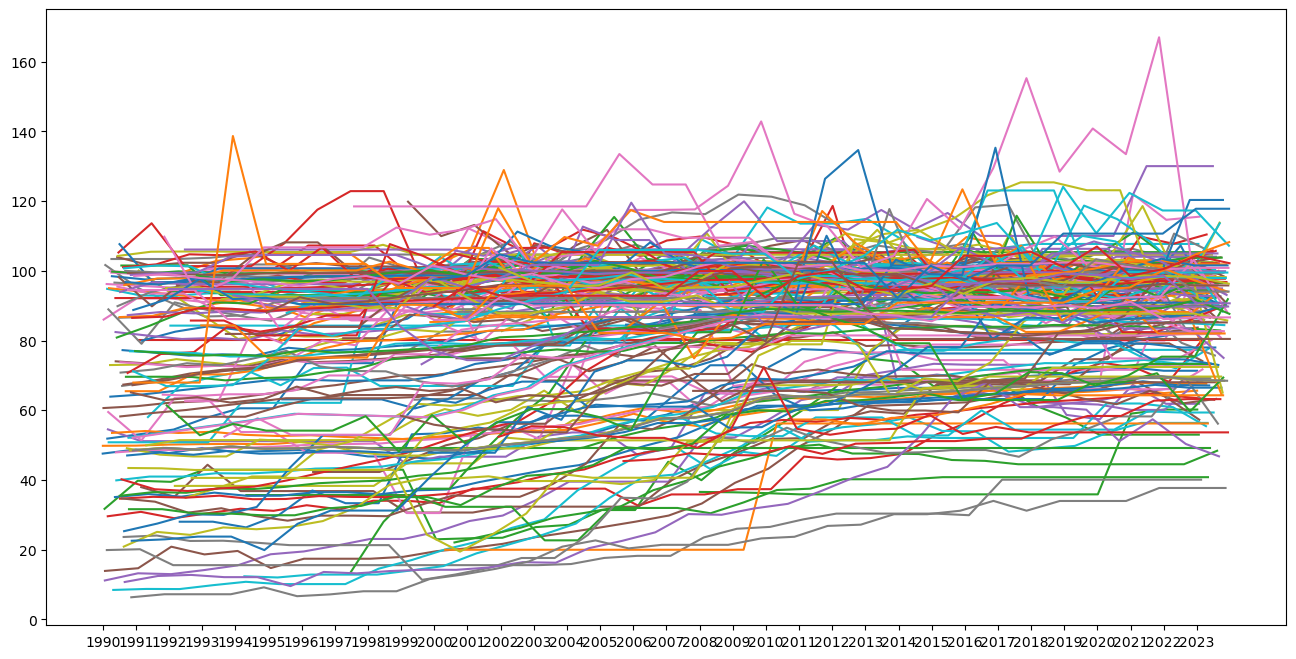

In [239]:
unique_years, idx = np.unique(data_womed['yearID'].values,return_index=True)
plt.xticks(data_womed.index[idx], unique_years)
ax = plt.gca()
data_womed.groupby('Country Code')['Primary completion rate, female (% of relevant age group)'].plot(figsize=(16,8))

In [240]:
df = pd.concat([data_gdppc,data_alled.iloc[:,-1],data_womse.iloc[:,-1],data_womed.iloc[:,-1]],axis=1)

In [241]:
df

,Country Code,Region,IncomeGroup,Indicator Name,yearID,"GDP per capita, PPP (current international $)","Primary completion rate, total (% of relevant age group)","School enrollment, primary, female (% gross)","Primary completion rate, female (% of relevant age group)"
0,AFE,-,-,"GDP per capita, PPP (current international $)",1990,1816.035866,51.859550,68.009560,47.559921
217,AFE,-,-,"GDP per capita, PPP (current international $)",1991,1829.114493,52.631981,69.372131,48.741920
434,AFE,-,-,"GDP per capita, PPP (current international $)",1992,1787.915919,51.509998,67.948502,47.698872
651,AFE,-,-,"GDP per capita, PPP (current international $)",1993,1780.641370,52.728588,68.108559,49.168579
868,AFE,-,-,"GDP per capita, PPP (current international $)",1994,1804.269969,51.338570,67.912148,48.006962
...,...,...,...,...,...,...,...,...,...
6509,ZWE,Sub-Saharan Africa,Lower middle income,"GDP per capita, PPP (current international $)",2019,2711.529334,90.232155,96.285933,89.272163
6726,ZWE,Sub-Saharan Africa,Lower middle income,"GDP per capita, PPP (current international $)",2020,2784.872395,91.866905,96.641973,91.124168
6943,ZWE,Sub-Saharan Africa,Lower middle income,"GDP per capita, PPP (current international $)",2021,3276.267753,86.099625,95.467535,86.142853
7160,ZWE,Sub-Saharan Africa,Lower middle income,"GDP per capita, PPP (current international $)",2022,3660.835501,86.116936,95.388789,86.648933


## Data visualization
The first guess is that primary completion rate is related to the region.

In [243]:
# plot a mean for every region
plot_df = df.loc[df['Region'] != '-'].groupby(["Region","yearID"])\
        [['GDP per capita, PPP (current international $)','Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

GDP per capita, PPP (current international $)  \
Region              yearID                                                  
East Asia & Pacific 1990                                      7735.078136   
                    1991                                      8059.802819   
                    1992                                      8452.817690   
                    1993                                      8745.355041   
                    1994                                      9195.306836   

                            Primary completion rate, female (% of relevant age group)  
Region              yearID                                                             
East Asia & Pacific 1990                                            88.889427          
                    1991                                            89.078600          
                    1992                                            83.452803          
                    1993                                            90.127908          
                    1994                                            87.101547

In [244]:
np.unique(df.loc[df['Region'] != '-']['Region'].values)

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

Region
East Asia & Pacific           Axes(0.125,0.11;0.775x0.77)
Europe & Central Asia         Axes(0.125,0.11;0.775x0.77)
Latin America & Caribbean     Axes(0.125,0.11;0.775x0.77)
Middle East & North Africa    Axes(0.125,0.11;0.775x0.77)
North America                 Axes(0.125,0.11;0.775x0.77)
South Asia                    Axes(0.125,0.11;0.775x0.77)
Sub-Saharan Africa            Axes(0.125,0.11;0.775x0.77)
dtype: object

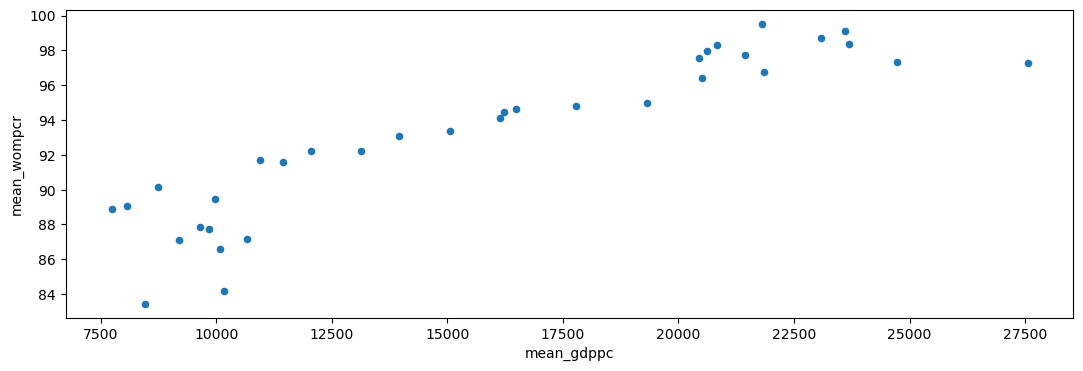

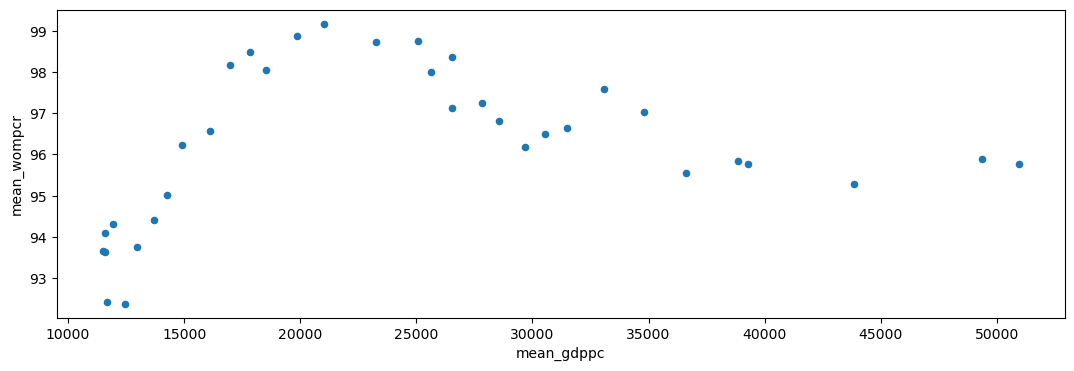

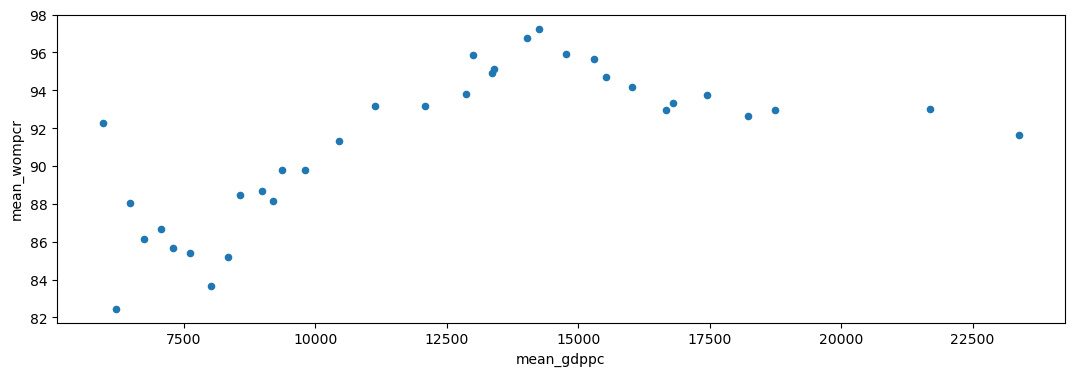

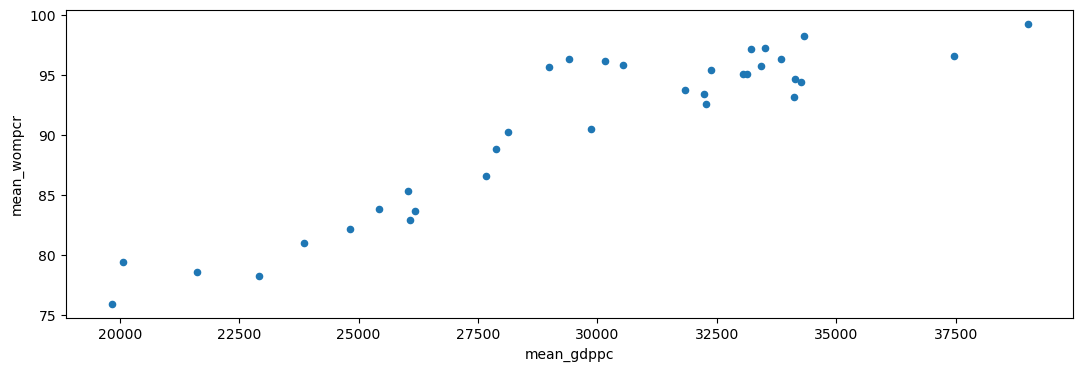

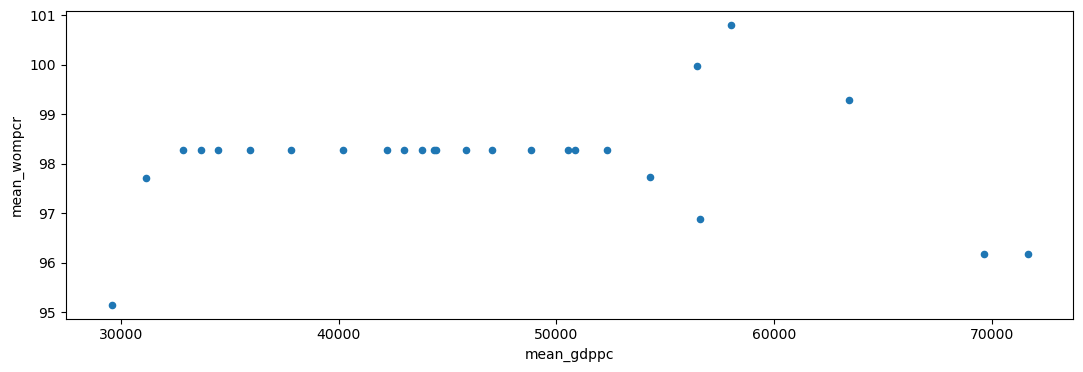

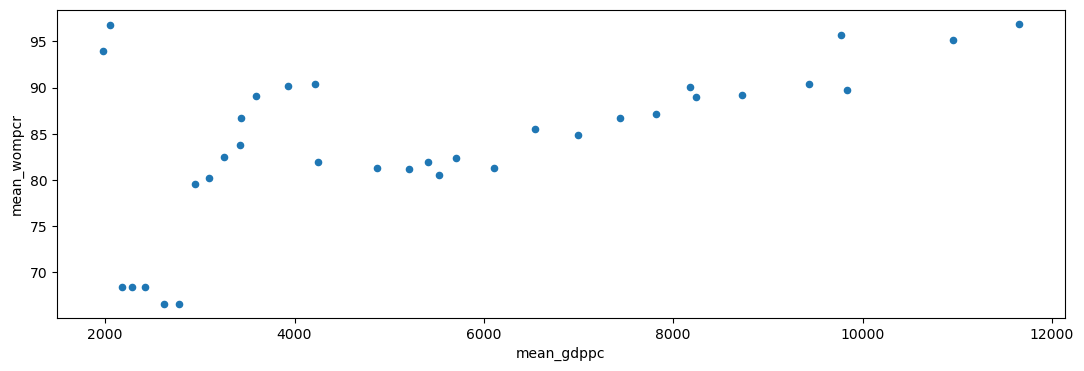

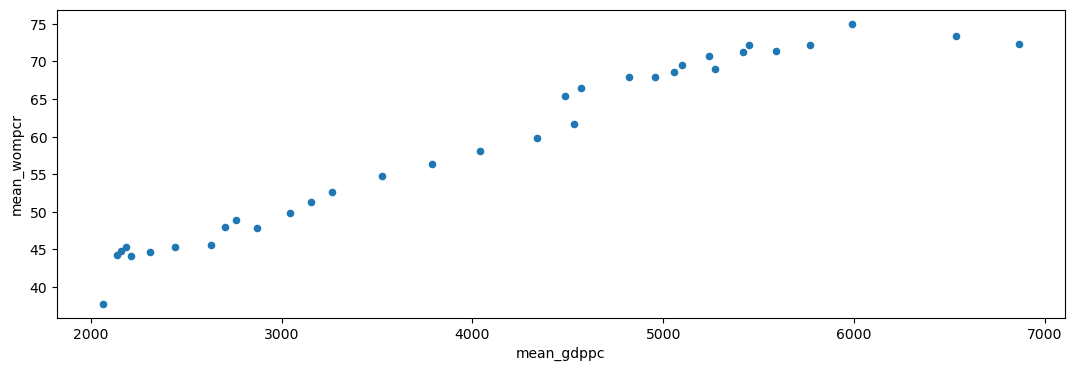

In [245]:
plot_df.rename(columns={"GDP per capita, PPP (current international $)": "mean_gdppc", 
                        "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('Region').plot.scatter(x='mean_gdppc',y='mean_wompcr',figsize=(13,4))

In [246]:
# Check if there is linear relationship in those values between GDP per capita and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('Region')
for k, g in plot_df_group:
    model = ols('mean_gdppc ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_gdppc   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.92e-14
Time:                        00:23:52   Log-Likelihood:                -312.54
No. Observations:                  34   AIC:                             629.1
Df Residuals:                      32   BIC:                             632.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -9.26e+04   8604.927    -10.762      

Except "Europe & Central Asia" and "North America", all other regions show that there exist a linear relationship between GDP per capita and female primary completion rate.

In [248]:
# change plot_df and seek linear relationship between other factors and female primary completion rate
plot_df = df.loc[df['Region'] != '-'].groupby(["Region","yearID"])[['Primary completion rate, total (% of relevant age group)','Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

Primary completion rate, total (% of relevant age group)  \
Region              yearID                                                             
East Asia & Pacific 1990                                            87.403410          
                    1991                                            88.644257          
                    1992                                            87.575024          
                    1993                                            90.043736          
                    1994                                            88.859834          

                            Primary completion rate, female (% of relevant age group)  
Region              yearID                                                             
East Asia & Pacific 1990                                            88.889427          
                    1991                                            89.078600          
                    1992                                            83.452803          
                    1993                                            90.127908          
                    1994                                            87.101547

Region
East Asia & Pacific           Axes(0.125,0.11;0.775x0.77)
Europe & Central Asia         Axes(0.125,0.11;0.775x0.77)
Latin America & Caribbean     Axes(0.125,0.11;0.775x0.77)
Middle East & North Africa    Axes(0.125,0.11;0.775x0.77)
North America                 Axes(0.125,0.11;0.775x0.77)
South Asia                    Axes(0.125,0.11;0.775x0.77)
Sub-Saharan Africa            Axes(0.125,0.11;0.775x0.77)
dtype: object

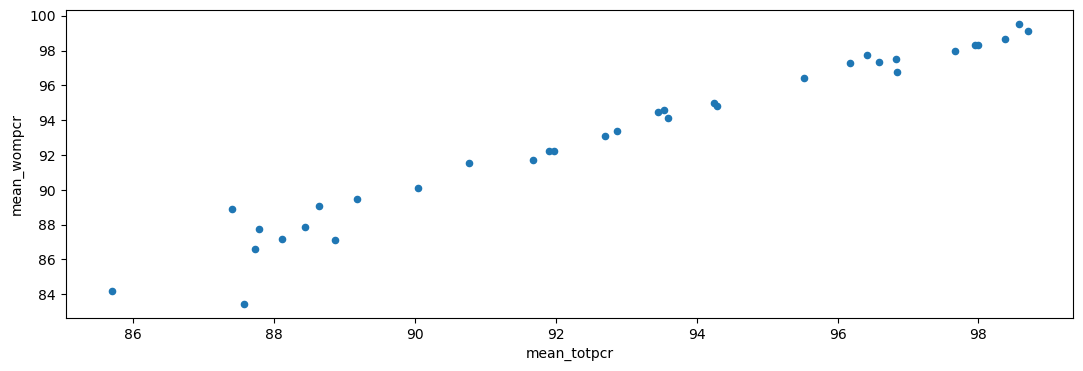

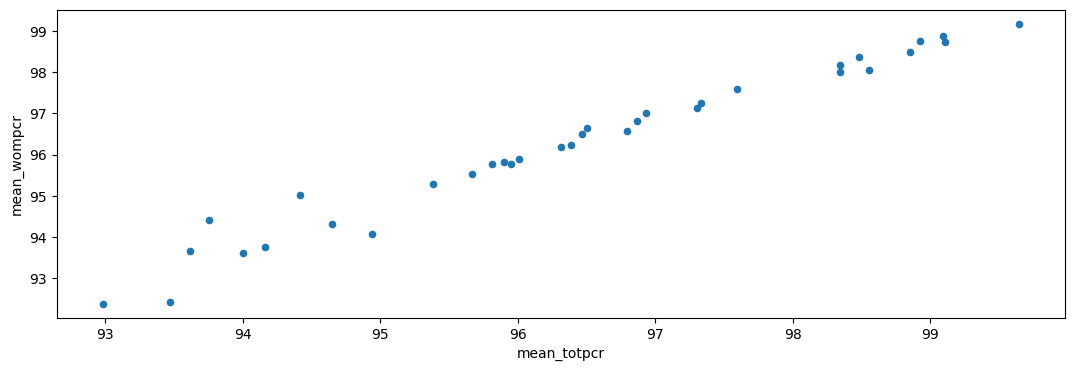

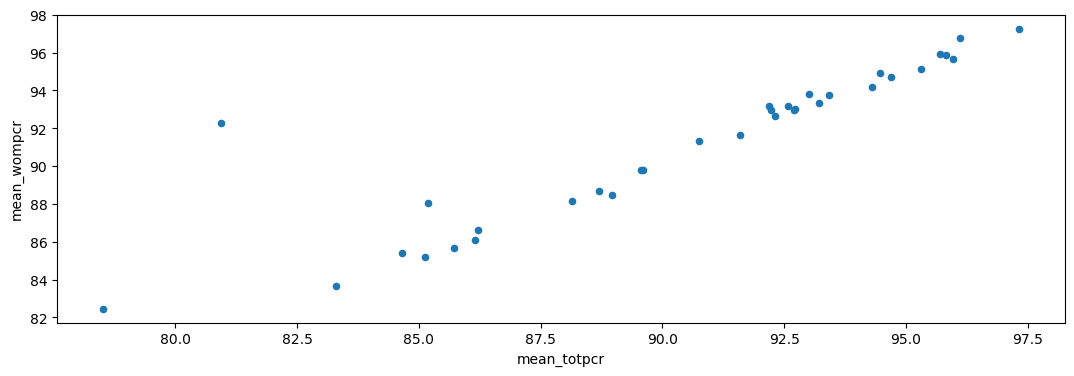

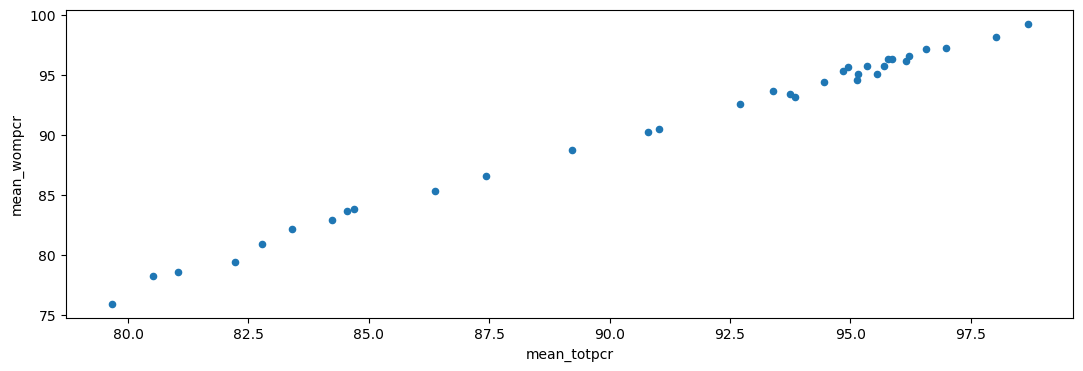

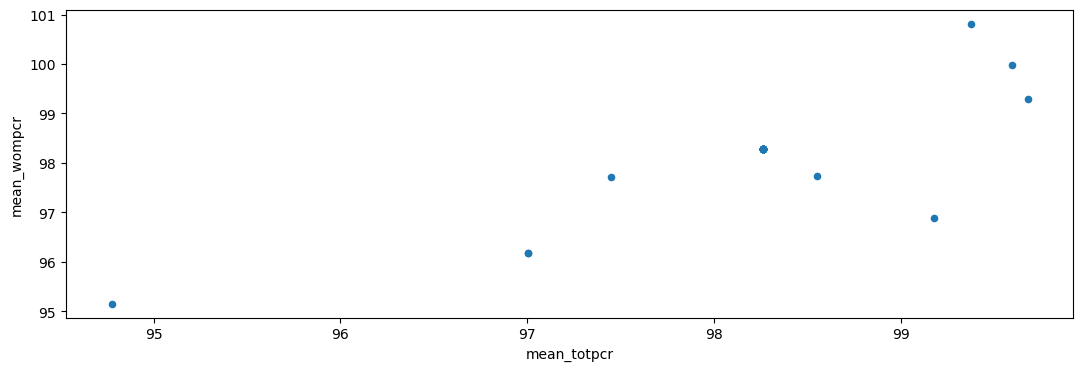

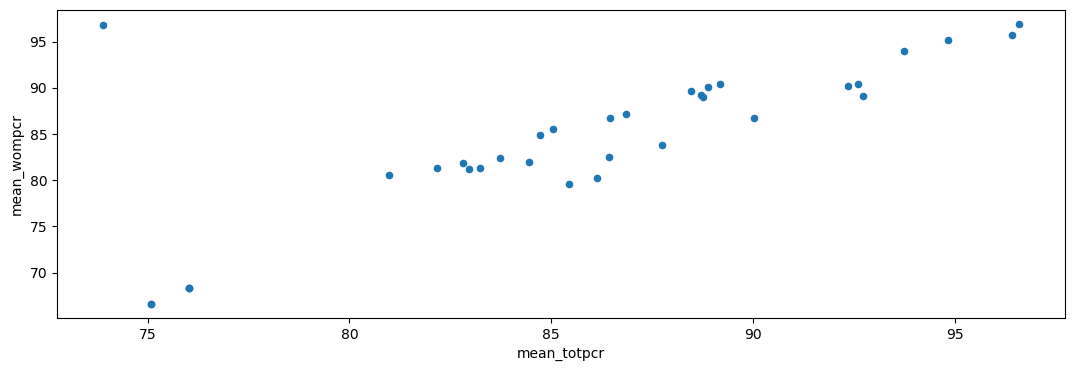

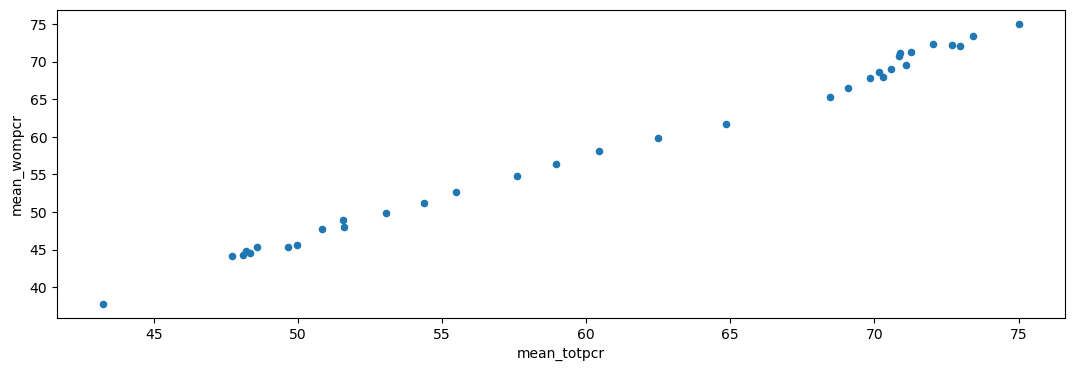

In [249]:
plot_df.rename(columns={"Primary completion rate, total (% of relevant age group)": "mean_totpcr", 
                        "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('Region').plot.scatter(x='mean_totpcr',y='mean_wompcr',figsize=(13,4))

In [250]:
# Check if there is linear relationship in those values between total and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('Region')
for k, g in plot_df_group:
    model = ols('mean_totpcr ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            mean_totpcr   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     807.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           2.84e-24
Time:                        00:23:53   Log-Likelihood:                -39.084
No. Observations:                  34   AIC:                             82.17
Df Residuals:                      32   BIC:                             85.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.4114      2.765      5.212      

From the scatterplots and summaries of OLS Regression Results above, except the intercept of "Europe & Central Asia" and "Latin America & Caribbean" might not be the predicted value by the model, for all other regions there exist a linear relationship with the predicted intercept between total primary school completion rate and female completion rate.

In [252]:
# change once again to check for the last related factor
plot_df = df.loc[df['Region'] != '-'].groupby(["Region","yearID"])\
                                                [['School enrollment, primary, female (% gross)',\
                                                  'Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

School enrollment, primary, female (% gross)  \
Region              yearID                                                 
East Asia & Pacific 1990                                       97.869307   
                    1991                                       98.906509   
                    1992                                       98.844266   
                    1993                                       99.614110   
                    1994                                       99.182130   

                            Primary completion rate, female (% of relevant age group)  
Region              yearID                                                             
East Asia & Pacific 1990                                            88.889427          
                    1991                                            89.078600          
                    1992                                            83.452803          
                    1993                                            90.127908          
                    1994                                            87.101547

Region
East Asia & Pacific           Axes(0.125,0.11;0.775x0.77)
Europe & Central Asia         Axes(0.125,0.11;0.775x0.77)
Latin America & Caribbean     Axes(0.125,0.11;0.775x0.77)
Middle East & North Africa    Axes(0.125,0.11;0.775x0.77)
North America                 Axes(0.125,0.11;0.775x0.77)
South Asia                    Axes(0.125,0.11;0.775x0.77)
Sub-Saharan Africa            Axes(0.125,0.11;0.775x0.77)
dtype: object

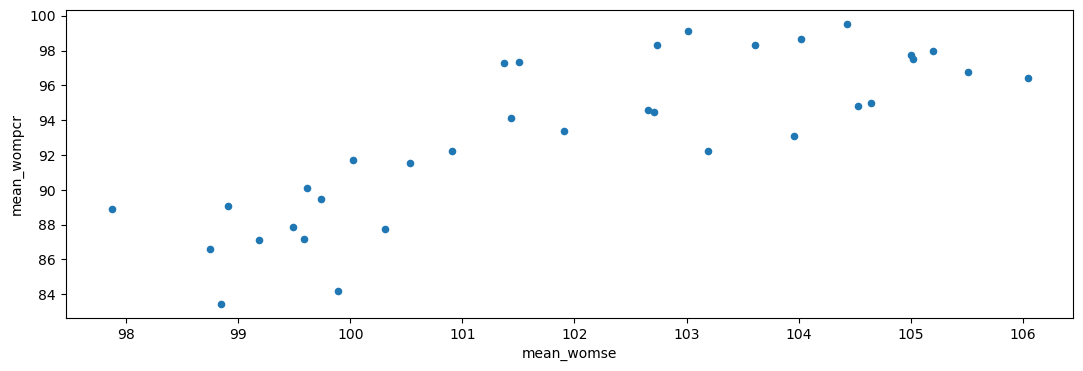

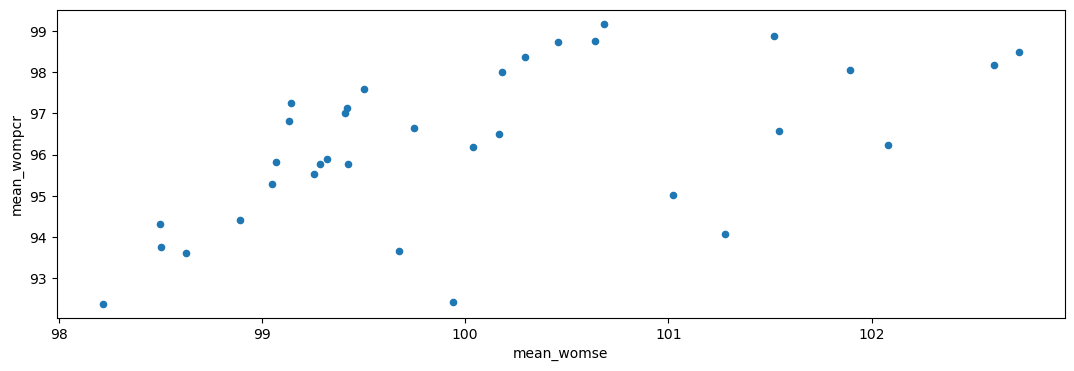

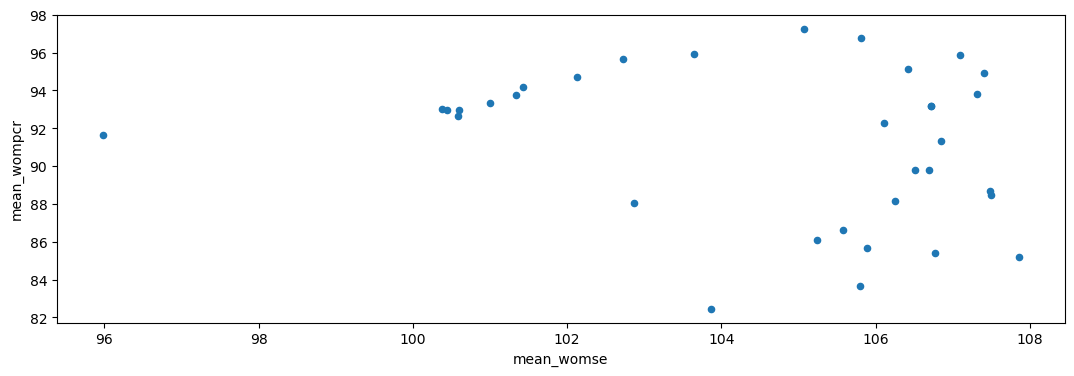

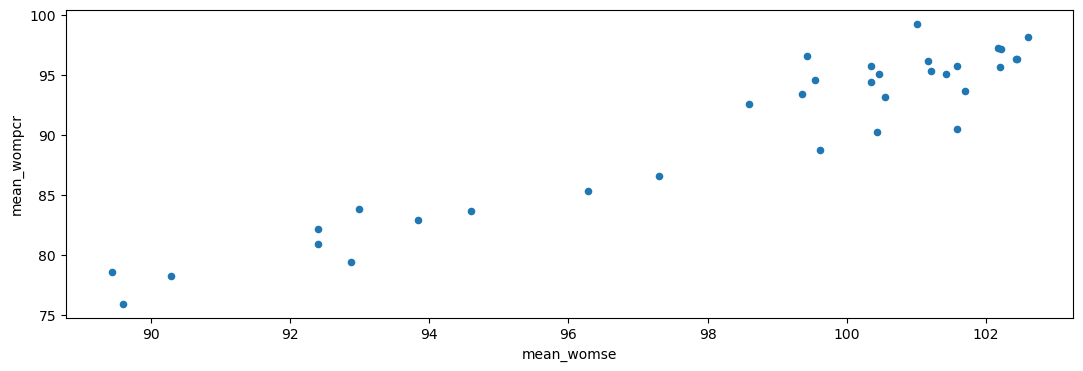

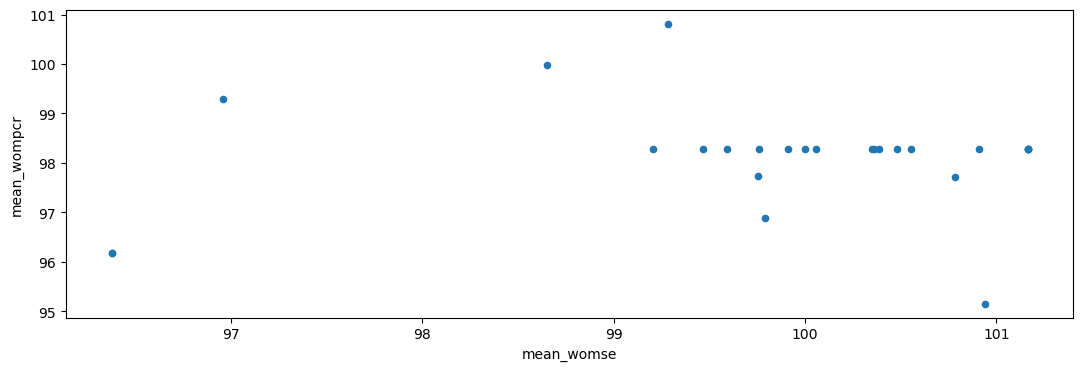

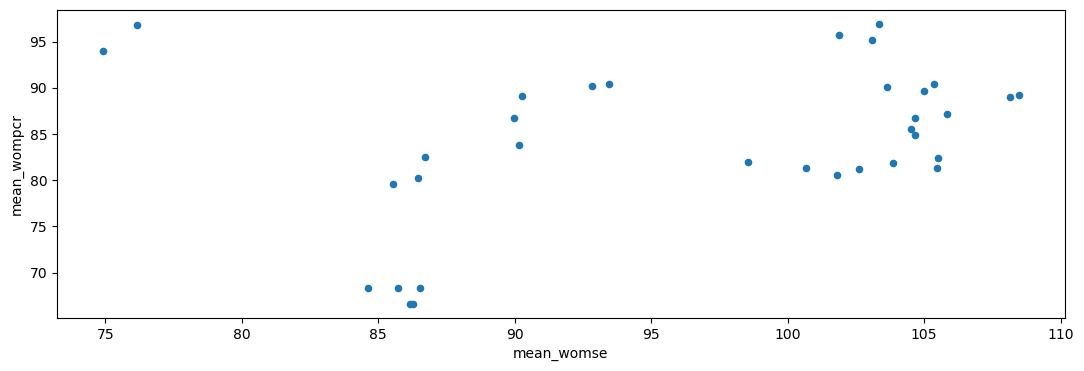

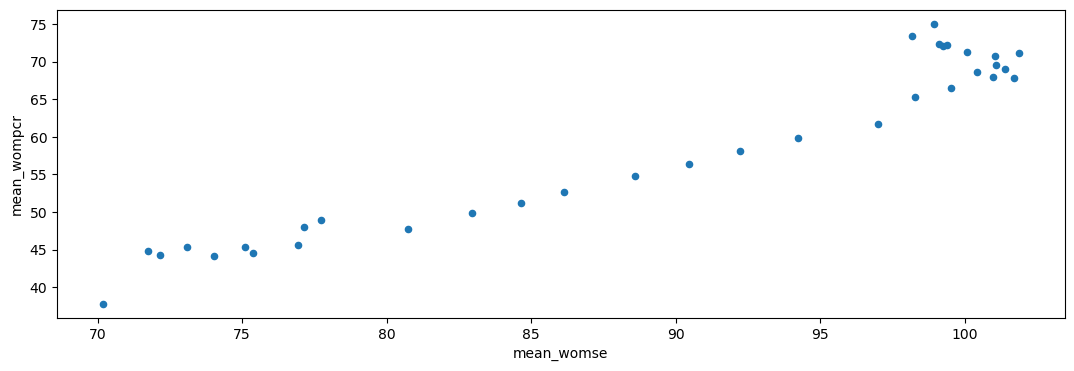

In [253]:
plot_df.rename(columns={"School enrollment, primary, female (% gross)": "mean_womse", "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('Region').plot.scatter(x='mean_womse',y='mean_wompcr',figsize=(13,4))

In [254]:
# Check if there is linear relationship in those values between total and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('Region')
for k, g in plot_df_group:
    model = ols('mean_womse ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_womse   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     64.05
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           3.89e-09
Time:                        00:23:53   Log-Likelihood:                -58.302
No. Observations:                  34   AIC:                             120.6
Df Residuals:                      32   BIC:                             123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      63.0443      4.866     12.955      

From the scatterplots and summaries of OLS Regression Results above, except the slope of "Latin America & Caribbean" and "North America", for all other regions there exist a linear relationship with the predicted slope and intercept between female primary school enrollment rate and female primary school completion rate.

Now, the next guess is that primary completion rate is related to the Income Group.

In [280]:
np.unique(df.loc[df['IncomeGroup'] != '-']['IncomeGroup'].values)

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [257]:
# plot a mean for every region
plot_df = df.loc[df['IncomeGroup'] != '-'].groupby(["IncomeGroup","yearID"])[['GDP per capita, PPP (current international $)','Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

GDP per capita, PPP (current international $)  \
IncomeGroup yearID                                                  
High income 1990                                     17065.133713   
            1991                                     17392.062549   
            1992                                     17974.899324   
            1993                                     18585.967649   
            1994                                     19449.166925   

                    Primary completion rate, female (% of relevant age group)  
IncomeGroup yearID                                                             
High income 1990                                            94.190805          
            1991                                            94.171681          
            1992                                            93.107316          
            1993                                            92.969019          
            1994                                            94.367092

IncomeGroup
High income            Axes(0.125,0.11;0.775x0.77)
Low income             Axes(0.125,0.11;0.775x0.77)
Lower middle income    Axes(0.125,0.11;0.775x0.77)
Upper middle income    Axes(0.125,0.11;0.775x0.77)
dtype: object

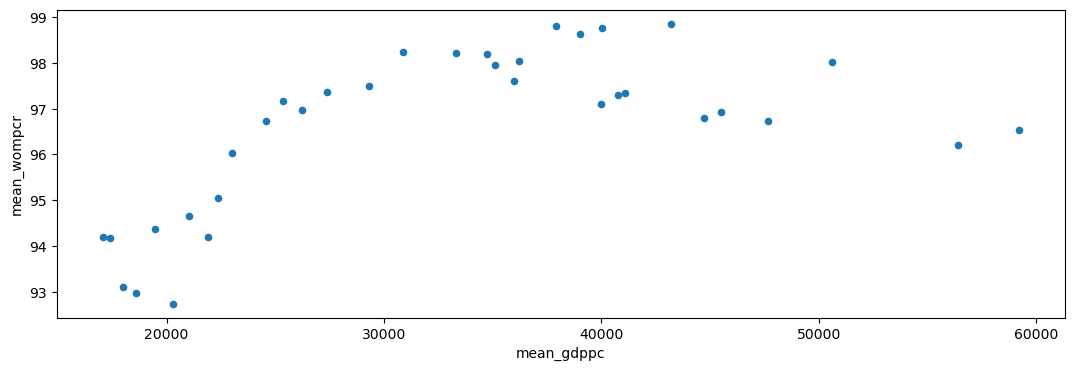

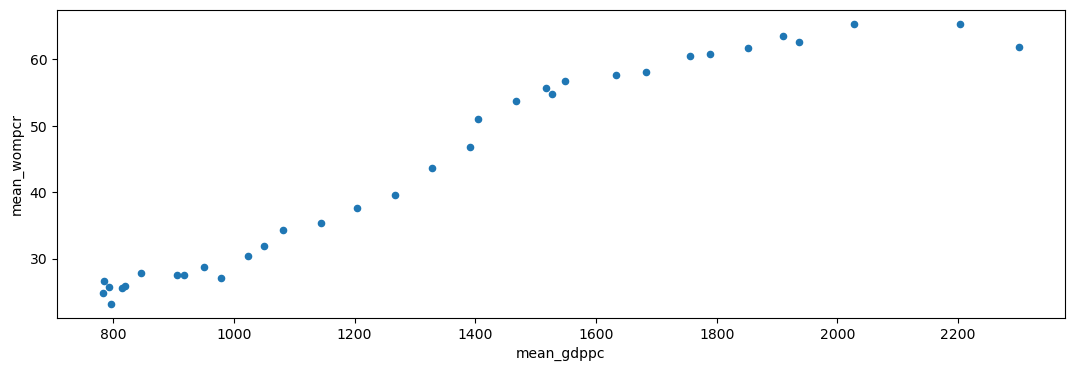

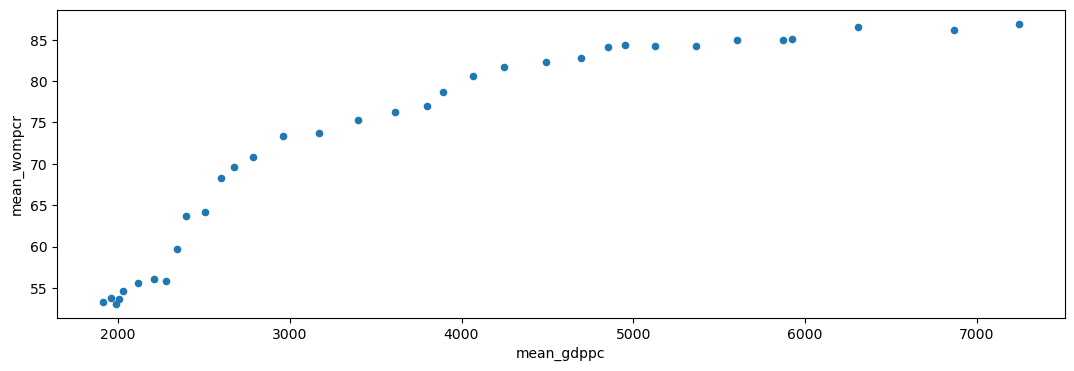

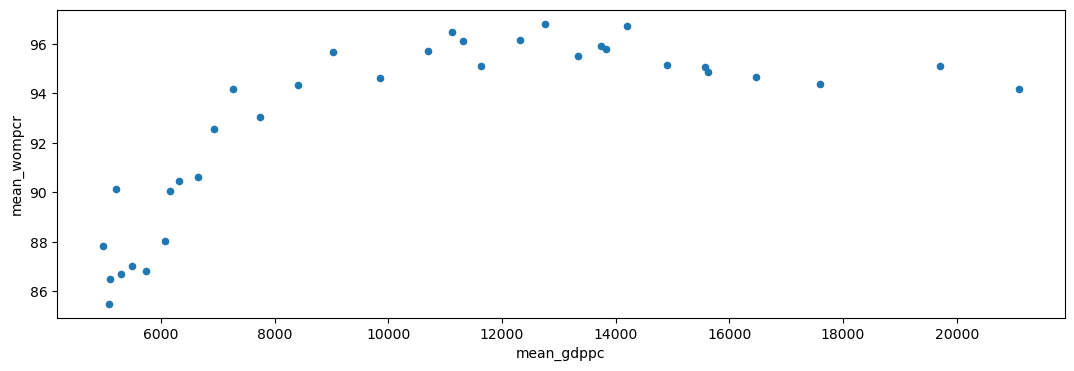

In [258]:
plot_df.rename(columns={"GDP per capita, PPP (current international $)": "mean_gdppc", "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('IncomeGroup').plot.scatter(x='mean_gdppc',y='mean_wompcr',figsize=(13,4))

In [259]:
# Check if there is linear relationship in those values between GDP per capita and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('IncomeGroup')
for k, g in plot_df_group:
    model = ols('mean_gdppc ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_gdppc   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     19.88
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           9.50e-05
Time:                        00:23:53   Log-Likelihood:                -357.75
No. Observations:                  34   AIC:                             719.5
Df Residuals:                      32   BIC:                             722.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.534e+05   8.67e+04     -4.077      

From the scatterplots and summaries of OLS Regression Results above, except the intercept of "Low Income" and the R-squared score for "High Income", for the other income groups there exist a linear relationship with the predicted slope and intercept between female primary school enrollment rate and female primary school completion rate.

In [263]:
# change plot_df and seek linear relationship between other factors and female primary completion rate
plot_df = df.loc[df['IncomeGroup'] != '-'].groupby(["IncomeGroup","yearID"])[['Primary completion rate, total (% of relevant age group)','Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

Primary completion rate, total (% of relevant age group)  \
IncomeGroup yearID                                                             
High income 1990                                            94.859804          
            1991                                            94.286613          
            1992                                            94.136171          
            1993                                            93.692947          
            1994                                            94.295637          

                    Primary completion rate, female (% of relevant age group)  
IncomeGroup yearID                                                             
High income 1990                                            94.190805          
            1991                                            94.171681          
            1992                                            93.107316          
            1993                                            92.969019          
            1994                                            94.367092

IncomeGroup
High income            Axes(0.125,0.11;0.775x0.77)
Low income             Axes(0.125,0.11;0.775x0.77)
Lower middle income    Axes(0.125,0.11;0.775x0.77)
Upper middle income    Axes(0.125,0.11;0.775x0.77)
dtype: object

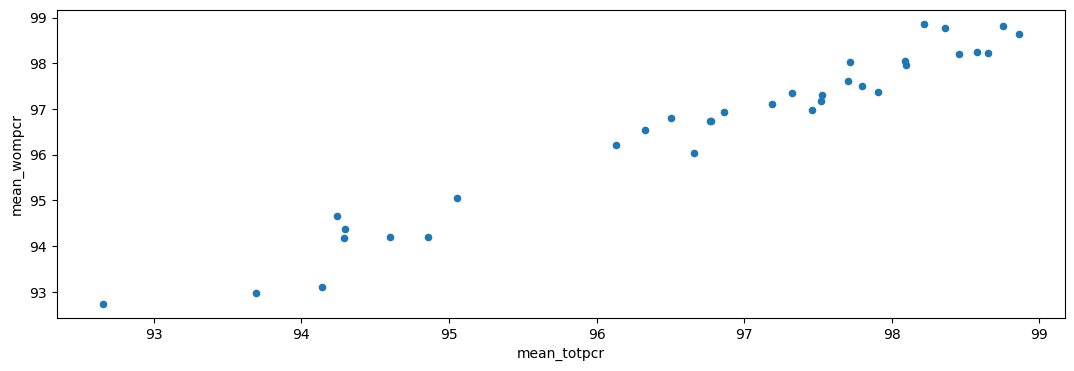

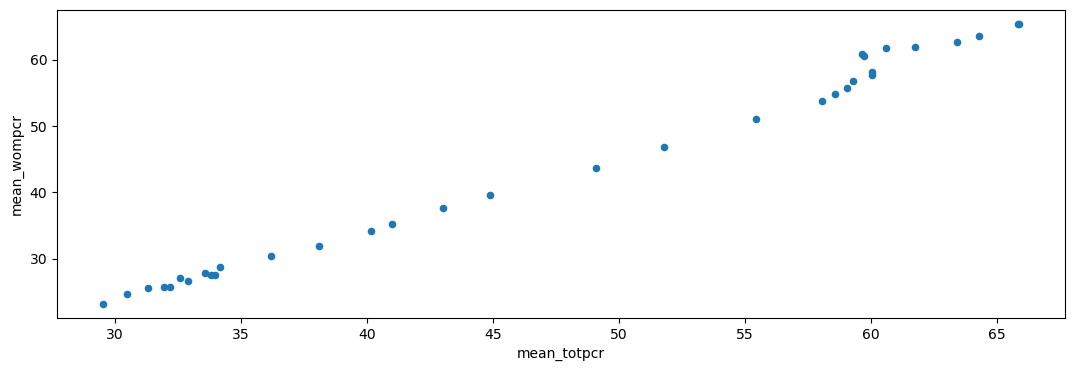

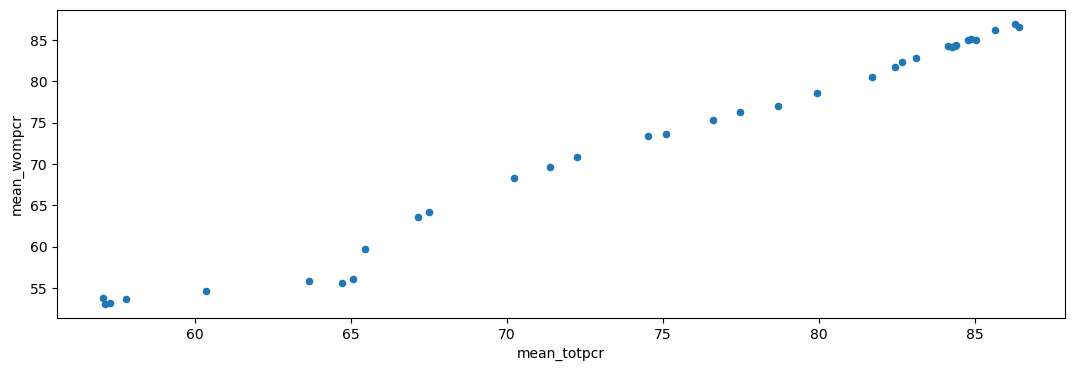

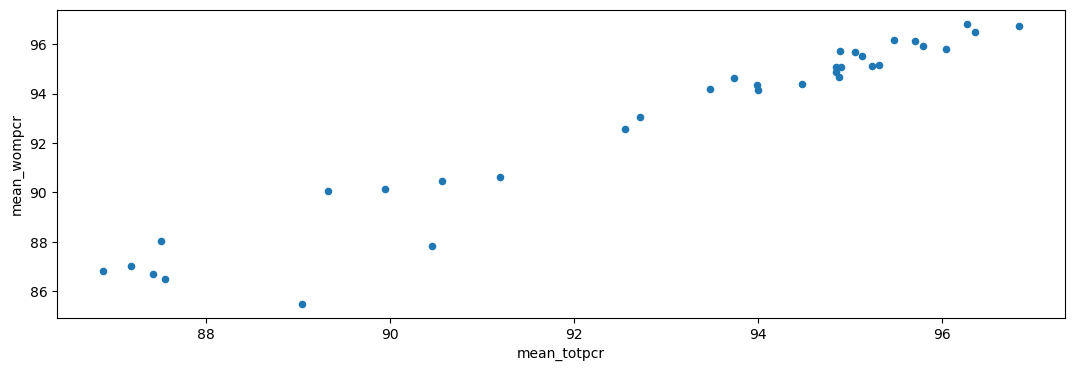

In [265]:
plot_df.rename(columns={"Primary completion rate, total (% of relevant age group)": "mean_totpcr", "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('IncomeGroup').plot.scatter(x='mean_totpcr',y='mean_wompcr',figsize=(13,4))

In [267]:
# Check if there is linear relationship in those values between total and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('IncomeGroup')
for k, g in plot_df_group:
    model = ols('mean_totpcr ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            mean_totpcr   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     787.1
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.19e-24
Time:                        00:39:50   Log-Likelihood:                -10.805
No. Observations:                  34   AIC:                             25.61
Df Residuals:                      32   BIC:                             28.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7201      3.208      2.095      

We can see from the above plots and OLS result summaries that all income groups have strong positive correlation between total and female primary completion rate.

In [270]:
# change once again to check for the last related factor
plot_df = df.loc[df['IncomeGroup'] != '-'].groupby(["IncomeGroup","yearID"])\
                                                [['School enrollment, primary, female (% gross)',\
                                                  'Primary completion rate, female (% of relevant age group)']].aggregate("mean")
plot_df.head()

School enrollment, primary, female (% gross)  \
IncomeGroup yearID                                                 
High income 1990                                       99.845736   
            1991                                       99.921435   
            1992                                       98.897535   
            1993                                       98.683318   
            1994                                       99.232701   

                    Primary completion rate, female (% of relevant age group)  
IncomeGroup yearID                                                             
High income 1990                                            94.190805          
            1991                                            94.171681          
            1992                                            93.107316          
            1993                                            92.969019          
            1994                                            94.367092

IncomeGroup
High income            Axes(0.125,0.11;0.775x0.77)
Low income             Axes(0.125,0.11;0.775x0.77)
Lower middle income    Axes(0.125,0.11;0.775x0.77)
Upper middle income    Axes(0.125,0.11;0.775x0.77)
dtype: object

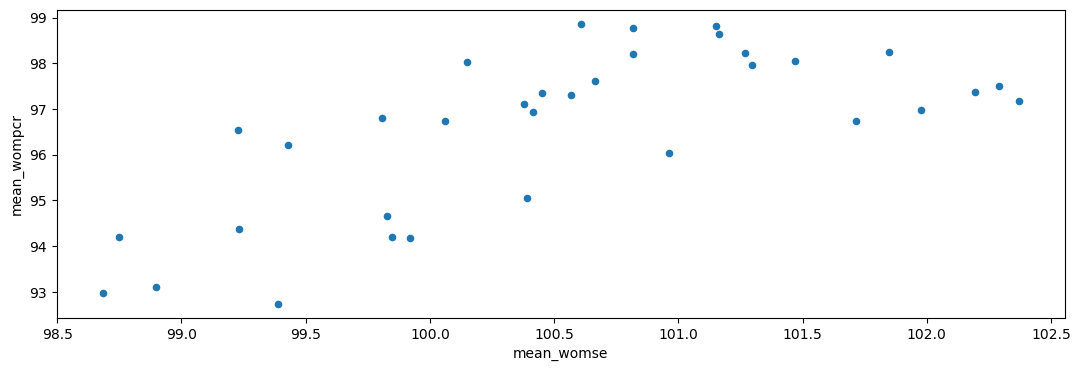

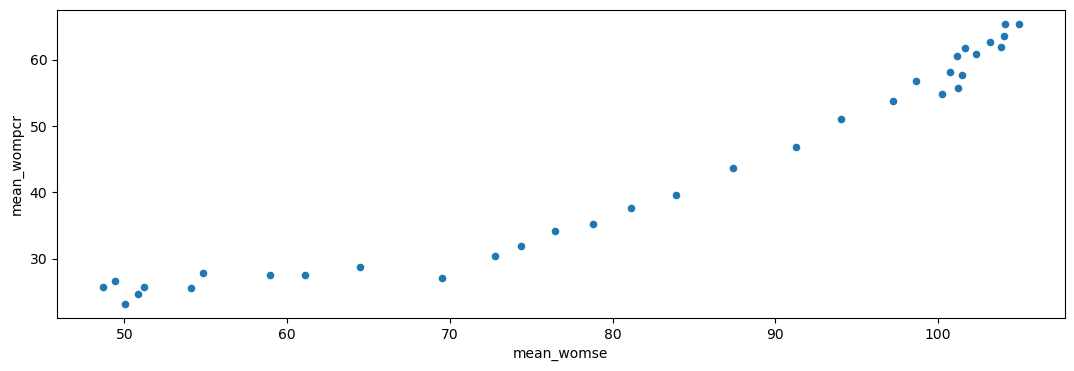

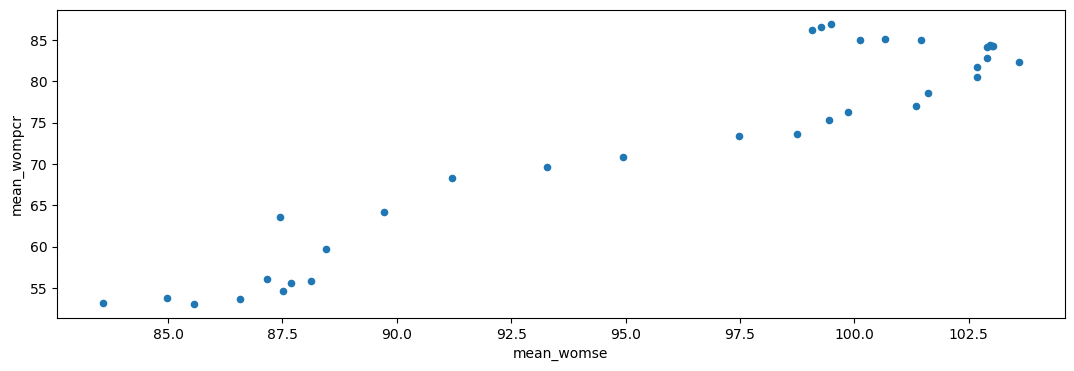

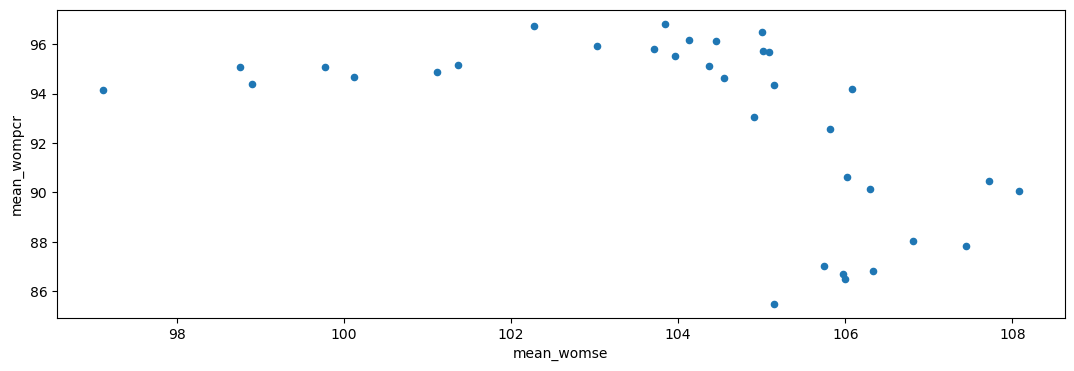

In [272]:
plot_df.rename(columns={"School enrollment, primary, female (% gross)": "mean_womse", "Primary completion rate, female (% of relevant age group)": "mean_wompcr"}, inplace = True)
plot_df.groupby('IncomeGroup').plot.scatter(x='mean_womse',y='mean_wompcr',figsize=(13,4))

In [274]:
# Check if there is linear relationship in those values between total and female primary completion rate.
# Instead of fitting a regression line, check the numerical results of OLS model describe the extent of fitting more directly measurable.
plot_df_group = plot_df.groupby('IncomeGroup')
for k, g in plot_df_group:
    model = ols('mean_womse ~ mean_wompcr', g)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_womse   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     29.89
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.11e-06
Time:                        00:48:02   Log-Likelihood:                -37.567
No. Observations:                  34   AIC:                             79.13
Df Residuals:                      32   BIC:                             82.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      62.0061      7.048      8.798      

As the above scatter plots and OLS result summaries indicate, the linear model can only predict the pattern between female primary school enrollment and female primary school completion rate within groups "Low Income" and "Lower Middle Income", so it's not very correlated with female primary school completion rate.

# Analysis, hypothesis testing and Machine Learning
As the 

# Other Resources 
1. J.P. Morgan Research post of economy recession probability<br>
https://www.jpmorgan.com/insights/global-research/economy/recession-probability#:~:text=Global%20recession%20outlook,by%20the%20end%20of%202025.<br><br>
2. The source of data and definitions of indicators<br>
https://databank.worldbank.org/metadataglossary/jobs/series/SE.PRM.CMPT.FE.ZS<br><br>
3. More about the importance of female primary education (MCC webpage)<br>
https://www.mcc.gov/who-we-select/indicator/girls-primary-education-completion-rate-indicator/#:~:text=This%20is%20measured%20as%20the,the%20last%20grade%20of%20primary.<br><br>
4. Short introduction and quick start on Numpy and Pandas:<br>
https://www.codecademy.com/article/introduction-to-numpy-and-pandas<br><br>